In [5]:
import numpy as np
import functions_Full
import importlib
importlib.reload(functions_Full)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [6]:
#plotting options
blue = sns.color_palette()[0]
red = sns.color_palette()[1]
green = sns.color_palette()[2]
yellow = sns.color_palette()[4]
black = sns.color_palette()[7]

# Seed for reproduceability
np.random.seed(1234)

In [7]:
D = 0.05        # 1/hr  # Dilution Rate
S_0 = 20.0      # g/L   # Inlet Nutrient Concentration
Y_X = 0.435     # 1     # Biomass Yield Coefficient
Y_A = 0.607     # 1     # Species A Yield Coefficient
Y_B = 0.3       # 1     # Species B Yield Coefficient
mu_0 = 0.22     # 1/hr  # Nominal Specific Growth Rate
K_S = 1.03      # g/L   # Monod Constant for Growth
K_A = 7.12      # g/L   # Species A Growth Inhibition Constant
K_B = 0.712     # g/L   # Species B Growth Inhibition Constant
K_EB = 0.5      # g/L   # Enzyme B Growth Inhibition Constant
R_A1 = 0        # 1/hr  # Minimum Enzyme A Production Rate
R_A2 = 1.79     # 1/hr  # Maximum Enzyme A Production Rate
K_SA = 1.68     # g/L   # Monod Constant for Production of A
K_AA = 14.0     # g/L   # Inhibition Constant for Production o A
R_B1 = 0.0985   # 1/hr  # Minimum Enzyme B Production Rate
R_B2 = 0.448    # 1/hr  # Maximum Enzyme B Production Rate
K_SB = 1.68     # g/L   # Monod Constant for Production of B
K_BB = 14.0     # g/L   # Inhibition Constant for Production of B
tau_1 = 5       # hr    # Time Constant for Enzyme A
tau_2 = 6.0     # hr    # Time Constant for Enzyme B
tau_3 = 1.0     # hr    # Time Constant for mRNA A
tau_4 = 1.0     # hr    # Time Constant for mRNA B
N_A = 2.7       # 1     # Hill Exponent for Species A
N_B = 2.3       # 1     # Hill Exponent for Species B
K_HA = 0.08     # 1     # Half Saturation Constant for Species A
K_HB = 0.30     # 1     # Half Saturation Constant for Species B


par = D, S_0, Y_X, Y_A, Y_B, mu_0, K_S, K_A, K_B, K_EB, R_A1,\
      R_A2, K_SA, K_AA, R_B1, R_B2, K_SB, K_BB, tau_1, tau_2, \
      tau_3, tau_4, N_A, N_B, K_HA, K_HB


In [8]:
importlib.reload(functions_Full)
steps = 160
t_step = 24
t_points = 24

t, X, A, B, S, E_A, E_B, R_A, R_B, u = \
    functions_Full.ODE_int(steps, t_step, t_points, par)

In [9]:
print(t[1,:10])

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


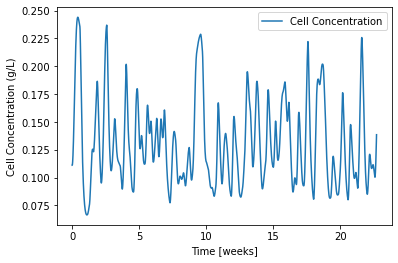

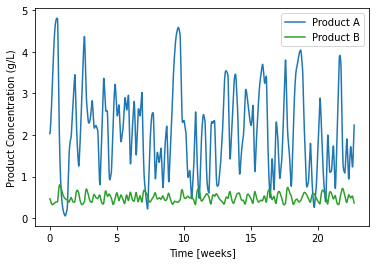

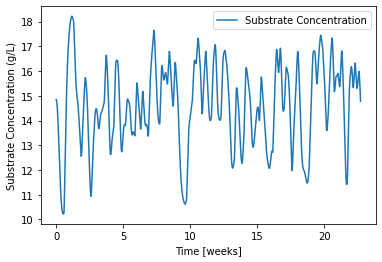

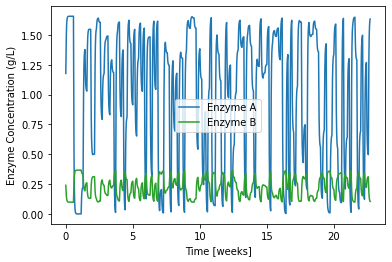

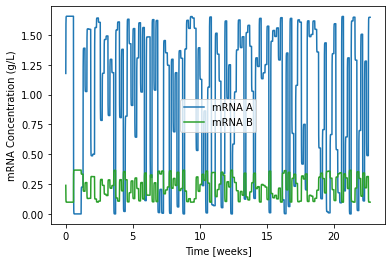

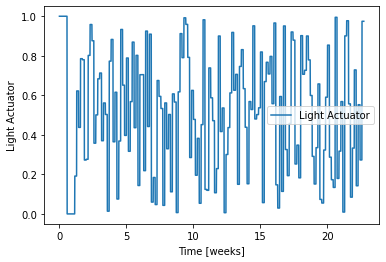

In [10]:
t_plot, X_plot, A_plot, B_plot, S_plot, \
E_A_plot, E_B_plot, R_A_plot, R_B_plot, u_plot = \
    t[1:,:].flatten() / (24 * 7), X[1:,:].flatten(), A[1:,:].flatten(), \
    B[1:,:].flatten(), S[1:,:].flatten(), E_A[1:,:].flatten(), \
    E_B[1:,:].flatten(), R_A[1:,:].flatten(), R_B[1:,:].flatten(), u[1:,:].flatten()

plt.figure()
plt.plot(t_plot, X_plot, c=blue, label = 'Cell Concentration')
plt.xlabel('Time [weeks]')
plt.ylabel('Cell Concentration (g/L)')
plt.legend()

plt.figure()
plt.plot(t_plot, A_plot, c=blue, label = 'Product A')
plt.plot(t_plot, B_plot, c=green, label = 'Product B')
plt.xlabel('Time [weeks]')
plt.ylabel('Product Concentration (g/L)')
plt.legend()

plt.figure()
plt.plot(t_plot, S_plot, c=blue, label = 'Substrate Concentration')
plt.xlabel('Time [weeks]')
plt.ylabel('Substrate Concentration (g/L)')
plt.legend()

plt.figure()
plt.plot(t_plot, E_A_plot, c=blue, label = 'Enzyme A')
plt.plot(t_plot, E_B_plot, c=green, label = 'Enzyme B')
plt.xlabel('Time [weeks]')
plt.ylabel('Enzyme Concentration (g/L)')
plt.legend()

plt.figure()
plt.plot(t_plot, R_A_plot, c=blue, label = 'mRNA A')
plt.plot(t_plot, R_B_plot, c=green, label = 'mRNA B')
plt.xlabel('Time [weeks]')
plt.ylabel('mRNA Concentration (g/L)')
plt.legend()

plt.figure()
plt.plot(t_plot, u_plot, c=blue, label = 'Light Actuator')
plt.xlabel('Time [weeks]')
plt.ylabel('Light Actuator')
plt.legend()

In [11]:
X_mean, A_mean, B_mean, S_mean, E_A_mean, E_B_mean, R_A_mean, R_B_mean = \
    np.mean(X), np.mean(A), np.mean(B), np.mean(S), \
    np.mean(E_A), np.mean(E_B), np.mean(R_A), np.mean(R_B)

X_sd, A_sd, B_sd, S_sd, E_A_sd, E_B_sd, R_A_sd, R_B_sd = \
    np.std(X), np.std(A), np.std(B), np.std(S), \
    np.std(E_A), np.std(E_B), np.std(R_A), np.std(R_B)

X_norm, A_norm, B_norm, S_norm, E_A_norm, E_B_norm, R_A_norm, R_B_norm = \
    (X - X_mean) / X_sd, (A - A_mean) / A_sd, \
    (B - B_mean) / B_sd, (S - S_mean) / S_sd, \
    (E_A - E_A_mean) / E_A_sd, (E_B - E_B_mean) / E_B_sd,\
    (R_A - R_A_mean) / R_A_sd, (R_B - R_B_mean) / R_B_sd,      

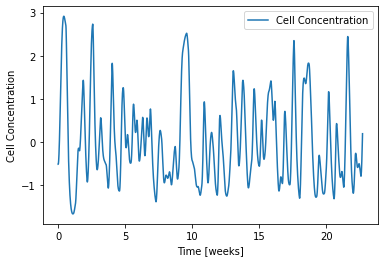

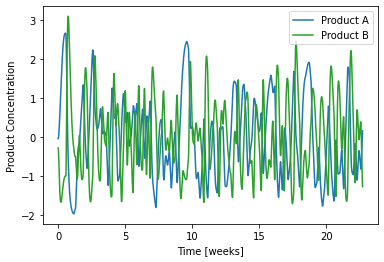

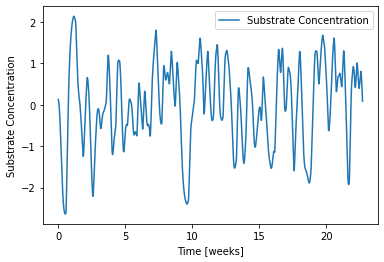

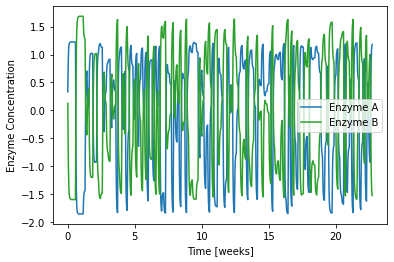

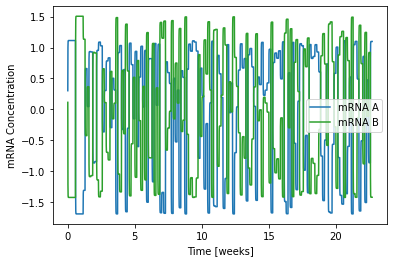

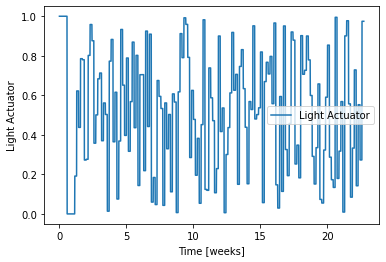

In [12]:
t_plot, X_plot, A_plot, B_plot, S_plot, \
E_A_plot, E_B_plot, R_A_plot, R_B_plot, u_plot = \
    t[1:,:].flatten() / (24 * 7), X_norm[1:,:].flatten(), \
    A_norm[1:,:].flatten(), B_norm[1:,:].flatten(), \
    S_norm[1:,:].flatten(), E_A_norm[1:,:].flatten(), \
    E_B_norm[1:,:].flatten(), R_A_norm[1:,:].flatten(), \
    R_B_norm[1:,:].flatten(), u[1:,:].flatten()

plt.figure()
plt.plot(t_plot, X_plot, c=blue, label = 'Cell Concentration')
plt.xlabel('Time [weeks]')
plt.ylabel('Cell Concentration')
plt.legend()

plt.figure()
plt.plot(t_plot, A_plot, c=blue, label = 'Product A')
plt.plot(t_plot, B_plot, c=green, label = 'Product B')
plt.xlabel('Time [weeks]')
plt.ylabel('Product Concentration')
plt.legend()

plt.figure()
plt.plot(t_plot, S_plot, c=blue, label = 'Substrate Concentration')
plt.xlabel('Time [weeks]')
plt.ylabel('Substrate Concentration')
plt.legend()

plt.figure()
plt.plot(t_plot, E_A_plot, c=blue, label = 'Enzyme A')
plt.plot(t_plot, E_B_plot, c=green, label = 'Enzyme B')
plt.xlabel('Time [weeks]')
plt.ylabel('Enzyme Concentration')
plt.legend()

plt.figure()
plt.plot(t_plot, R_A_plot, c=blue, label = 'mRNA A')
plt.plot(t_plot, R_B_plot, c=green, label = 'mRNA B')
plt.xlabel('Time [weeks]')
plt.ylabel('mRNA Concentration')
plt.legend()

plt.figure()
plt.plot(t_plot, u_plot, c=blue, label = 'Light Actuator')
plt.xlabel('Time [weeks]')
plt.ylabel('Light Actuator')
plt.legend()

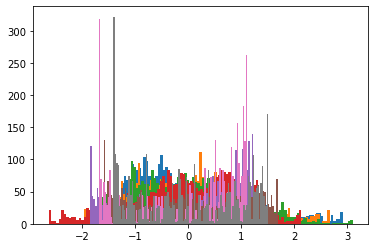

In [13]:
plt.figure()
_ = plt.hist(X_plot, bins=100)
_ = plt.hist(A_plot, bins=100)
_ = plt.hist(B_plot, bins=100)
_ = plt.hist(S_plot, bins=100)
_ = plt.hist(E_A_plot, bins=100)
_ = plt.hist(E_B_plot, bins=100)
_ = plt.hist(R_A_plot, bins=100)
_ = plt.hist(R_B_plot, bins=100)
# t_plot, X_plot, A_plot, B_plot, S_plot, \
# E_A_plot, E_B_plot, R_A_plot, R_B_plot, u_plot = \

In [14]:
print(t[1,0:10:5])

[0. 5.]


In [15]:
time_embed = 10
time_delay = 5

# Training Set Size
ts_size = 2000
training_t = t[1:,:].flatten()[:ts_size]
h = t[1:,:].flatten()[1:ts_size] - t[1:,:].flatten()[:ts_size-1]
h = np.append(h,0)
training_set = np.array([X_norm[1:,:].flatten()[:ts_size], A_norm[1:,:].flatten()[:ts_size], 
                B_norm[1:,:].flatten()[:ts_size], S_norm[1:,:].flatten()[:ts_size],
                        u[1:,:].flatten()[:ts_size], h]).transpose()

test_t = t[1:,:].flatten()[ts_size:]
h = t[1:,:].flatten()[ts_size+1:] - t[1:,:].flatten()[ts_size:-1]
h_test = np.append(h,0)
test_set = np.array([X_norm[1:,:].flatten()[ts_size:], A_norm[1:,:].flatten()[ts_size:], 
                B_norm[1:,:].flatten()[ts_size:], S_norm[1:,:].flatten()[ts_size:],
                        u[1:,:].flatten()[ts_size:]]).transpose()

training_set_TE = training_set[:len(training_set)-(time_embed-1)*time_delay,:5]
print(training_set_TE.shape)
# for i in range(time_embed - 1):
#     training_set_TE = np.append(training_set_TE,
#                     training_set[(i+1)*time_delay:len(training_set)-(time_embed-1)*time_delay+(i+1)*time_delay,:5], axis=1)
#     print(training_set_TE.shape)
# training_set_TE = np.append(training_set_TE,
#                  training_set[(time_embed-1)*time_delay:,5].reshape((-1,1)), axis=1)

for i in range((time_embed-1)*time_delay):
    training_set_TE = np.append(training_set_TE,
                    training_set[(i+1):len(training_set)-(time_embed-1)*time_delay+(i+1),:5], axis=1)
    print(training_set_TE.shape)
training_set_TE = np.append(training_set_TE,
                 training_set[(time_embed-1)*time_delay:,5].reshape((-1,1)), axis=1)
# training_set_TE = training_set[time_embed-1:,5].reshape((-1,1))

train_in = training_set_TE[:-1,:]
train_out = training_set[(time_embed-1)*time_delay+1:,:-2]

print(train_in.shape)
print(train_out.shape)
print(training_set.shape)

(1955, 5)
(1955, 10)
(1955, 15)
(1955, 20)
(1955, 25)
(1955, 30)
(1955, 35)
(1955, 40)
(1955, 45)
(1955, 50)
(1955, 55)
(1955, 60)
(1955, 65)
(1955, 70)
(1955, 75)
(1955, 80)
(1955, 85)
(1955, 90)
(1955, 95)
(1955, 100)
(1955, 105)
(1955, 110)
(1955, 115)
(1955, 120)
(1955, 125)
(1955, 130)
(1955, 135)
(1955, 140)
(1955, 145)
(1955, 150)
(1955, 155)
(1955, 160)
(1955, 165)
(1955, 170)
(1955, 175)
(1955, 180)
(1955, 185)
(1955, 190)
(1955, 195)
(1955, 200)
(1955, 205)
(1955, 210)
(1955, 215)
(1955, 220)
(1955, 225)
(1955, 230)
(1954, 231)
(1954, 4)
(2000, 6)


In [19]:
np.save('Data/trainingset.npy',training_set)
np.save('Data/trainingset_TE.npy',training_set_TE)

In [26]:
importlib.reload(functions_Full)

HL = 7
HL_Nodes = 20
Activation = 'softplus'
learning_rate_pred = 1e-3 # default is 1e-3

print(train_in.shape)
RK4_model = functions_Full.RK4_Integrator_Model_TE_7_CL(HL_Nodes, Activation, time_embed, time_delay)
# RK4_model = functions_Full.RK4_Integrator_Model_TE_7(HL_Nodes, Activation, time_embed)
# RK4_model = functions_Full.RK4_Integrator_Model_TE(HL_Nodes, Activation, time_embed, time_delay)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_pred)
RK4_model.build(train_in.shape)
RK4_model.compile(optimizer=optimizer,
              loss='mse',       # mean squared error
              metrics=['mae'])  # mean absolute error
RK4_model.summary()

(1954, 231)
Model: "r_k4__integrator__model_te_7_cl_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              multiple                  1020      
_________________________________________________________________
dense_9 (Dense)              multiple                  420       
_________________________________________________________________
dense_10 (Dense)             multiple                  420       
_________________________________________________________________
dense_11 (Dense)             multiple                  420       
_________________________________________________________________
dense_12 (Dense)             multiple                  420       
_________________________________________________________________
dense_13 (Dense)             multiple                  420       
_________________________________________________________________
dense_14 (Dense)     

In [27]:
import kerasUtils
importlib.reload(kerasUtils)

Pbar = kerasUtils.Pbar
batch_size = ts_size
Epoch_Num = 10000
history = RK4_model.fit(train_in,train_out,
                          batch_size=batch_size,
                          validation_split=0.1,
                          epochs=Epoch_Num, verbose=False, shuffle=False, 
                          callbacks=[Pbar(Epoch_Num)]
                         )

Training: 100%|██████████| 10000/10000 [07:25<00:00, 21.90Epoch/s]

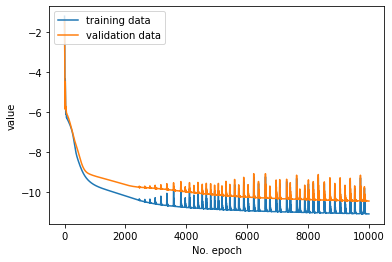

In [28]:
plt.plot(np.log(history.history['loss']), label='training data')
plt.plot(np.log(history.history['val_loss']), label='validation data')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [29]:
from tqdm import tqdm
index = -1

pred_offline = np.zeros(np.shape(test_set))
pred_offline[0:((time_embed-1)*time_delay+1),:] = test_set[0:((time_embed-1)*time_delay+1),:]
pred_offline[:,-1:] = test_set[:,-1:]

pbar = tqdm(total=np.shape(test_set)[0] - 1, position=0, leave=True)

for i in range(np.shape(test_set)[0] - ((time_embed-1)*time_delay+1)):
    pbar.update()
    input = pred_offline[i:i+((time_embed-1)*time_delay+1),:].reshape((1,-1))
    input = np.append(input, h_test[i+((time_embed-1)*time_delay+1)]).reshape((1,-1))
    output = RK4_model.predict(input)
    pred_offline[i+((time_embed-1)*time_delay+1),:-1] = output
    

 98%|█████████▊| 1770/1815 [00:54<00:01, 28.94it/s], 21.90Epoch/s]

Text(0, 0.5, 'Light')

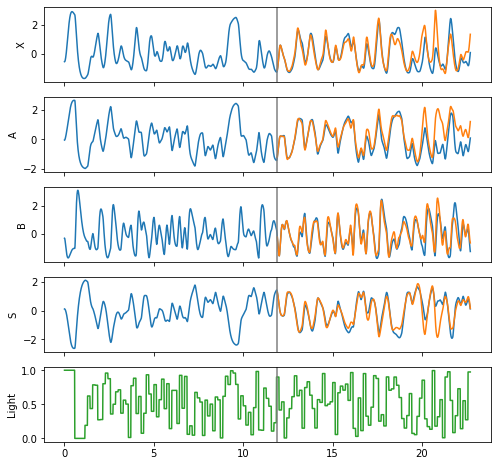

 98%|█████████▊| 1770/1815 [01:18<00:01, 28.66it/s]

In [33]:
plottill = -1

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, sharex=True, sharey=False, figsize=(8,8))
ax1.plot(training_t / (24*7), training_set[:,0], c=blue)
ax1.plot(test_t[:plottill] / (24*7), test_set[:plottill,0], c=blue)
ax1.plot(test_t[:plottill] / (24*7), pred_offline[:plottill,0], c=red)
ax1.axvline(x=test_t[0] / (24*7),c=black)
ax1.set_ylabel('X')

ax2.plot(training_t / (24*7), training_set[:,1], c=blue)
ax2.plot(test_t[:plottill] / (24*7), test_set[:plottill,1], c=blue)
ax2.plot(test_t[:plottill] / (24*7), pred_offline[:plottill,1], c=red)
ax2.axvline(x=test_t[0] / (24*7),c=black)
ax2.set_ylabel('A')

ax3.plot(training_t / (24*7), training_set[:,2], c=blue)
ax3.plot(test_t[:plottill] / (24*7), test_set[:plottill,2], c=blue)
ax3.plot(test_t[:plottill] / (24*7), pred_offline[:plottill,2], c=red)
ax3.axvline(x=test_t[0] / (24*7),c=black)
ax3.set_ylabel('B')

ax4.plot(training_t / (24*7), training_set[:,3], c=blue)
ax4.plot(test_t[:plottill] / (24*7), test_set[:plottill,3], c=blue)
ax4.plot(test_t[:plottill] / (24*7), pred_offline[:plottill,3], c=red)
ax4.axvline(x=test_t[0] / (24*7),c=black)
ax4.set_ylabel('S')

ax5.plot(training_t / (24*7), training_set[:,4], c=green)
ax5.plot(test_t[:plottill] / (24*7), test_set[:plottill,4], c=green)
ax5.axvline(x=test_t[0] / (24*7),c=black)
ax5.set_ylabel('Light')

In [31]:
from tqdm import tqdm

pred_online = np.zeros(np.shape(test_set))
pred_online[0:((time_embed-1)*time_delay+1),:] = test_set[0:((time_embed-1)*time_delay+1),:]
pred_online[:,-1:] = test_set[:,-1:]

pbar = tqdm(total=np.shape(test_set)[0] - 1, position=0, leave=True)

for i in range(np.shape(test_set)[0] - ((time_embed-1)*time_delay+1)):
    pbar.update()
    input = test_set[i:i+((time_embed-1)*time_delay+1),:].reshape((1,-1))
    input = np.append(input, h_test[i+((time_embed-1)*time_delay+1)]).reshape((1,-1))
    output = RK4_model.predict(input)
    pred_online[i+((time_embed-1)*time_delay+1),:-1] = output

 97%|█████████▋| 1769/1815 [00:59<00:01, 28.66it/s]

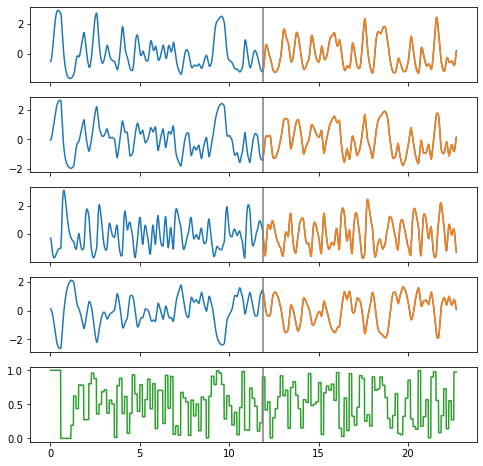

In [32]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, sharex=True, sharey=False, figsize=(8,8))
ax1.plot(training_t / (24*7), training_set[:,0], c=blue)
ax1.plot(test_t / (24*7), test_set[:,0], c=blue)
ax1.plot(test_t / (24*7), pred_online[:,0], c=red)
ax1.axvline(x=test_t[0] / (24*7),c=black)

ax2.plot(training_t / (24*7), training_set[:,1], c=blue)
ax2.plot(test_t / (24*7), test_set[:,1], c=blue)
ax2.plot(test_t / (24*7), pred_online[:,1], c=red)
ax2.axvline(x=test_t[0] / (24*7),c=black)

ax3.plot(training_t / (24*7), training_set[:,2], c=blue)
ax3.plot(test_t / (24*7), test_set[:,2], c=blue)
ax3.plot(test_t / (24*7), pred_online[:,2], c=red)
ax3.axvline(x=test_t[0] / (24*7),c=black)

ax4.plot(training_t / (24*7), training_set[:,3], c=blue)
ax4.plot(test_t / (24*7), test_set[:,3], c=blue)
ax4.plot(test_t / (24*7), pred_online[:,3], c=red)
ax4.axvline(x=test_t[0] / (24*7),c=black)

ax5.plot(training_t / (24*7), training_set[:,4], c=green)
ax5.plot(test_t / (24*7), test_set[:,4], c=green)
ax5.axvline(x=test_t[0] / (24*7),c=black)

In [34]:
# RK4_model.save('Models/myModel_29-08-2020')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Models/myModel_29-08-2020/assets


In [4]:
import numpy as np
import tensorflow as tf
from scipy.interpolate import interp1d
from jitcdde import jitcdde as dde
from jitcdde import y as y_dde
from jitcdde import t as t_dde
from sympy.utilities.lambdify import lambdify, implemented_function
import symengine

time_embed = 10
time_delay = 5

RK4_model_load = tf.keras.models.load_model('Models/myModel_29-08-2020')
training_set_TE = np.load('Data/trainingset.npy')
test_set = np.load('Data/testset.npy')


ANN1 = RK4_model_load.ANN1
ANN2 = RK4_model_load.ANN2
ANN3 = RK4_model_load.ANN3
ANN4 = RK4_model_load.ANN4
ANN5 = RK4_model_load.ANN5
ANN6 = RK4_model_load.ANN6
ANN7 = RK4_model_load.ANN7
ANNout = RK4_model_load.ANNout

inputs = tf.keras.Input(shape=(time_embed*5,))
x = ANN7(inputs)
x = ANN6(x)
x = ANN5(x)
x = ANN4(x)
x = ANN3(x)
x = ANN2(x)
x = ANN1(x)
outputs = ANNout(x)

odeModel = tf.keras.Model(inputs=inputs, outputs=outputs)

# my_h = h[0]

pred_ODE = np.zeros(np.shape(test_set))
pred_ODE[0:((time_embed-1)*time_delay+1),:] = test_set[0:((time_embed-1)*time_delay+1),:]
pred_ODE[:,-1:] = test_set[:,-1:]

light_fun = interp1d(test_t, pred_ODE, axis=0)
print(light_fun(2001))

t0 = test_t[(time_embed-1)*time_delay]


inputs = np.array([y_dde(0,t_dde), y_dde(1,t_dde), y_dde(2,t_dde), y_dde(3,t_dde)])
for i in range(time_embed-1):
    t_del = t_dde - time_delay * (i+1)
    input_add = np.array([y_dde(0,t_del), y_dde(1,t_del), y_dde(2,t_del), y_dde(3,t_del)])
    inputs = np.concatenate((input_add,inputs))
print(inputs)
print(type(inputs[0]))
print(inputs.shape)

# input_fun = lambda x: odeModel.predict([x])
# input_fun = lambdify(inputs,odeModel.predict(inputs),modules='tensorflow')
input_fun = symengine.Function("input_fun")
f_with_callback = [input_fun(0,t_dde,*inputs),
                   input_fun(1,t_dde,*inputs),
                   input_fun(2,t_dde,*inputs),
                   input_fun(3,t_dde,*inputs)]
                   

def my_NN_callback_50(i,t_dde,y0_0,y0_2,y0_3,y0_4,
                         y1_0,y1_2,y1_3,y1_4,
                         y2_0,y2_2,y2_3,y2_4,
                         y3_0,y3_2,y3_3,y3_4,
                         y4_0,y4_2,y4_3,y4_4,
                         y5_0,y5_2,y5_3,y5_4,
                         y6_0,y6_2,y6_3,y6_4,
                         y7_0,y7_2,y7_3,y7_4,
                         y8_0,y8_2,y8_3,y8_4,
                         y9_0,y9_2,y9_3,y9_4):
    inputs = np.array([y0_0,y0_2,y0_3,y0_4,light_fun(t_dde-(time_embed-1)*time_delay),
                         y1_0,y1_2,y1_3,y1_4,light_fun(t_dde-(time_embed-2)*time_delay),
                         y2_0,y2_2,y2_3,y2_4,light_fun(t_dde-(time_embed-3)*time_delay),
                         y3_0,y3_2,y3_3,y3_4,light_fun(t_dde-(time_embed-4)*time_delay),
                         y4_0,y4_2,y4_3,y4_4,light_fun(t_dde-(time_embed-5)*time_delay),
                         y5_0,y5_2,y5_3,y5_4,light_fun(t_dde-(time_embed-6)*time_delay),
                         y6_0,y6_2,y6_3,y6_4,light_fun(t_dde-(time_embed-7)*time_delay),
                         y7_0,y7_2,y7_3,y7_4,light_fun(t_dde-(time_embed-8)*time_delay),
                         y8_0,y8_2,y8_3,y8_4,light_fun(t_dde-(time_embed-9)*time_delay),
                         y9_0,y9_2,y9_3,y9_4,light_fun(t_dde-(time_embed-10)*time_delay)])
    outputs = odeModel.predict(inputs)[i]
    return outputs


DDE_callback = dde(
        f_with_callback,
        callback_functions = [(input_fun,my_NN_callback_50,42)],
    )

for i in range(time_embed):
    my_t = t0 - i*time_delay
    DDE_callback.add_past_point(my_t,light_fun(my_t)[:4],np.zeros(4))
DDE_callback.adjust_diff()
# f = [
#     y_dde(0,t_dde),
#     y_dde(1,t_dde),
#     y_dde(2,t_dde),
#     y_dde(3,t_dde),
#     y_dde(4,t_dde),
# ]

# DDE = dde(odefun,max_delay=(time_embed-1)*time_delay,verbose=False)
# for i in range(time_embed):
#     my_t = t0 - i*time_delay
#     DDE.add_past_point(my_t,light_fun(my_t),np.zeros(5))

NameError: name 'test_set' is not defined

In [ ]:
# from scipy.integrate import solve_ivp
# from tqdm import tqdm
# 
# init = pred_ODE[time_embed,:-1]
# 
# pbar = tqdm(total=len(test_t) - time_embed, position=0, leave=True)
# for j in range(len(test_t) - time_embed - 1):
#     init = pred_ODE[j+time_embed,:-1]
#     pbar.update()
#     sol = solve_ivp(myANN_ODE, [test_t[j+time_embed], test_t[j+time_embed+1]], init, 
#                     t_eval=[test_t[j+time_embed+1]], 
#               args=[pred_ODE[j+time_embed+1,-1]], method='BDF')
#     pred_ODE[j+time_embed+1,:-1] = sol.y.flatten()

In [ ]:
# j = 3890
# print(j)
# print(len(test_t))
# sol2 = solve_ivp(myANN_ODE, [test_t[j+time_embed-1], test_t[j+time_embed]], init, t_eval=[test_t[j+time_embed]], 
#               args=[pred_ODE[j+time_embed,-1]], method='BDF')

In [ ]:
# fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, sharex=True, sharey=False, figsize=(8,8))
# ax1.plot(training_t, training_set[:,0], c=blue)
# ax1.plot(test_t, test_set[:,0], c=blue)
# ax1.plot(test_t, pred_ODE[:,0], c=red)
# 
# ax2.plot(training_t, training_set[:,1], c=blue)
# ax2.plot(test_t, test_set[:,1], c=blue)
# ax2.plot(test_t, pred_ODE[:,1], c=red)
# 
# ax3.plot(training_t, training_set[:,2], c=blue)
# ax3.plot(test_t, test_set[:,2], c=blue)
# ax3.plot(test_t, pred_ODE[:,2], c=red)
# 
# ax4.plot(training_t, training_set[:,3], c=blue)
# ax4.plot(test_t, test_set[:,3], c=blue)
# ax4.plot(test_t, pred_ODE[:,3], c=red)
# 
# ax5.plot(training_t, training_set[:,4], c=green)
# ax5.plot(test_t, test_set[:,4], c=green)